# Colab データインストール

In [0]:
# 以下を実行すると、認証情報を取得するための許可を求められるので、許可してトークンを発行し、テキストボックスに貼り付ける。
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

In [0]:
# Colabにおいてデータを読みこむ。グーグルドライブをマウントします。その為に必要なパッケージを取得しておく。
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse


In [0]:
# 以下実行により、今度は google-drive-ocamlfuse によるアクセスの許可を聞かれる。これも許可する。
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# 今回は指定したフォルダのみマウントする
!cp -f ~/.gdfuse/default/config config
!sed -i -e "s/^root_folder=$/root_folder=1FwGdPnKlcYYRe1mZGE5Ci-PWlIY8k5J7/" config
# 上記が正常に終われば、ようやくマウントが可能となる。
!mkdir -p drive
!google-drive-ocamlfuse -config ./config -cc drive
!ls drive

Clearing cache...done
8_10-11  compare-deeplibs.ipynb      Santander_Value_Prediction_Challenge
8_3-4	 dataマウントテンプレ.ipynb  test.ipynb
8_5-6	 dataset		     week3-EDA
8_7-8	 Kaggle_0		     week4


In [0]:
# これ以降はターミナルと同様にディレクトリを扱える
ls

config  datalab/  drive/


In [0]:
cd drive/dataset/breast-cancer-wisconsin/ 

/content/drive/dataset/breast-cancer-wisconsin


In [0]:
ls

wpbc_name.txt  wpbc.txt


# 本編

## Import

In [0]:
# pandas and numpy for data manipulation
import numpy as np
import pandas as pd 

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# sklearn
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

In [0]:
# pandasのデータの表示設定
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_row', 200)

In [0]:
# データフレームの読み込み
df = pd.read_csv('wpbc.txt')

# カラム名を設定
df.columns =[
'ID number', 'Outcome', 'Time',
'Mean_Radius', 'Mean_Texture', 'Mean_Perimeter', 'Mean_Area', 'Mean_Smoothness', 'Mean_Compactness', 'Mean_Concavity', 'Mean_Concave_Points', 'Mean_Symmetry', 'Mean_Fractal_Dimension',
'SE_Radius', 'SE_Texture', 'SE_Perimeter', 'SE_Area', 'SE_Smoothness', 'SE_Compactness', 'SE_Concavity', 'SE_Concave_Points', 'SE_Symmetry', 'SE_Fractal_Dimension',
'Worst_Radius', 'Worst_Texture', 'Worst_Perimeter', 'Worst_Area', 'Worst_Smoothness', 'Worst_Compactness', 'Worst_Concavity', 'Worst_Concave_Points', 'Worst_Symmetry', 'Worst_Fractal Dimension',
'Tumor_Size', 'Lymph_Node_Status']

# 目的変数と説明変数に切り分け
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)

print(y.shape)
print(X.shape)

(197,)
(197, 34)


In [0]:
X.head()

,ID number,Time,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,...,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal Dimension,Tumor_Size,Lymph_Node_Status
0,8423,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
1,842517,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
2,843483,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
3,843584,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
4,843786,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,0.07666,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0


IDがXに含まれているため切り取っておきます

In [0]:
X_ID = X['ID number']
X = X.drop(['ID number'], axis=1)

## EDA

### 欠損値

データセットの説明にこのようにある  

Missing attribute values:   
	Lymph node status is missing in 4 cases.  
    
これをチェックする

In [0]:
X['Lymph_Node_Status'].value_counts()

0     87
1     35
2     17
4     10
7      6
13     6
?      4
9      4
3      4
6      3
15     3
11     3
8      2
20     2
10     2
27     2
18     1
14     1
5      1
17     1
24     1
21     1
16     1
Name: Lymph_Node_Status, dtype: int64

どうやら'?'が欠損値のようなので、これを処理する  
今回は最頻値0を入れることにする。

In [0]:
pd.DataFrame(X.replace('?', '0', inplace = True))

""


最後に?が処理できたか確認する

In [0]:
(X == '?').sum()

Time                       0
Mean_Radius                0
Mean_Texture               0
Mean_Perimeter             0
Mean_Area                  0
Mean_Smoothness            0
Mean_Compactness           0
Mean_Concavity             0
Mean_Concave_Points        0
Mean_Symmetry              0
Mean_Fractal_Dimension     0
SE_Radius                  0
SE_Texture                 0
SE_Perimeter               0
SE_Area                    0
SE_Smoothness              0
SE_Compactness             0
SE_Concavity               0
SE_Concave_Points          0
SE_Symmetry                0
SE_Fractal_Dimension       0
Worst_Radius               0
Worst_Texture              0
Worst_Perimeter            0
Worst_Area                 0
Worst_Smoothness           0
Worst_Compactness          0
Worst_Concavity            0
Worst_Concave_Points       0
Worst_Symmetry             0
Worst_Fractal Dimension    0
Tumor_Size                 0
Lymph_Node_Status          0
dtype: int64

### カテゴリー変数

まずカテゴリー変数が含まれるか確認する

In [0]:
print(pd.DataFrame(X).dtypes.unique())
print(pd.DataFrame(y).dtypes.unique())


[dtype('int64') dtype('float64') dtype('O')]
[dtype('O')]


どうやらカテゴリー（'O'）が含まれるようなので詳しく確認する

#### Xのカテゴリーを処理する

In [0]:
X.select_dtypes(include='O')

,Lymph_Node_Status
0,2
1,0
2,0
3,0
4,0
5,0
6,10
7,1
8,20
9,0


全ての要素がnumericですが、型だけObjectのようなので型変換します。

In [0]:
X['Lymph_Node_Status'] = X['Lymph_Node_Status'].astype('int64')

In [0]:
pd.DataFrame(X).dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

### yのカテゴリーを処理する

In [0]:
y.unique()

array(['N', 'R'], dtype=object)

Outcome (R = recur, N = nonrecur)です  
Rは1、Nは0に設定します

In [0]:
y = pd.DataFrame(y.replace('N', '0'))
y = pd.DataFrame(y.replace('R', '1'))

In [0]:
y = y.astype('int64')

In [0]:
pd.DataFrame(y).dtypes.unique()

array([dtype('int64')], dtype=object)

In [0]:
y.head()

,Outcome
0,0
1,0
2,0
3,1
4,1


### Xの標準化

In [0]:
X = (X - X.mean())/ X.std()

In [0]:
X.head()

,Time,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,...,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal Dimension,Tumor_Size,Lymph_Node_Status
0,0.410856,0.183238,-2.765153,0.371173,0.088312,1.250129,2.697966,2.032204,1.774797,1.785767,...,1.527624,1.045453,0.825593,1.827881,1.579521,1.914611,1.812879,1.320916,0.084394,-0.208462
1,2.003568,1.249675,-1.120364,1.056902,1.142038,-1.145036,-0.479433,-0.438442,-0.149013,1.473076,...,0.647277,0.926303,-1.147978,-0.128585,-0.551687,0.534813,1.458046,-0.009774,-0.173767,-0.575132
2,2.206277,-1.889688,-0.435423,-1.738259,-1.653451,3.171683,2.824101,1.201580,0.540376,2.432966,...,-1.432068,-1.424863,2.990154,3.052274,1.435715,1.739363,4.519973,3.871053,-0.431928,-0.575132
3,-0.573729,0.908920,-1.842580,0.944946,0.926761,-0.193030,-0.201135,0.587456,0.513861,-0.432161,...,0.409066,0.289702,-0.302162,-0.982061,-0.214605,-0.368045,-1.160008,-0.664514,0.342554,-0.575132
4,0.874191,-1.470055,-1.621256,-1.410789,-1.323170,1.289995,0.281381,0.140306,-0.300443,0.244125,...,-1.141035,-1.143159,1.207574,0.327130,0.935269,-0.181706,0.329758,1.273779,-0.173767,-0.575132


## FutureEngineering

## Plot

X,yまとめたデータを作成する

In [0]:
data = pd.concat([X, y], axis=1)

### ヒートマップ

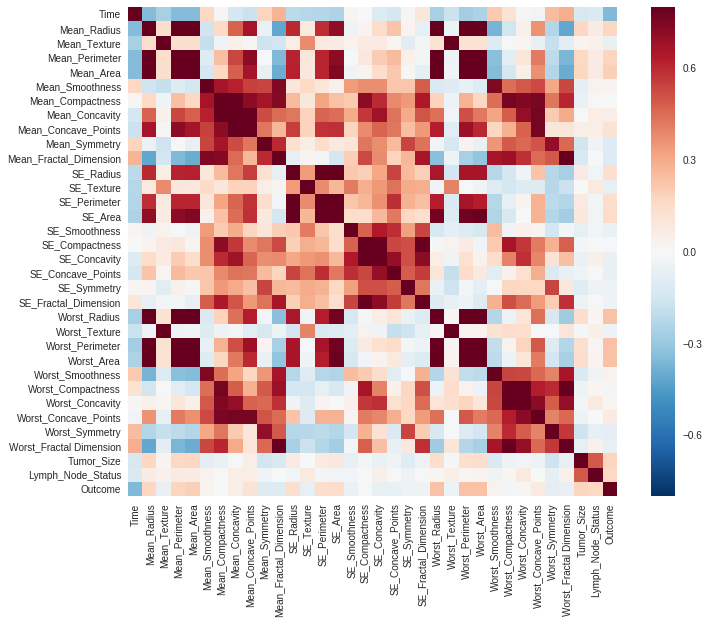

In [0]:
r = X
r = pd.concat([r,y],axis=1)
r_matrix = r.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(r_matrix, vmax=.8, square=True)

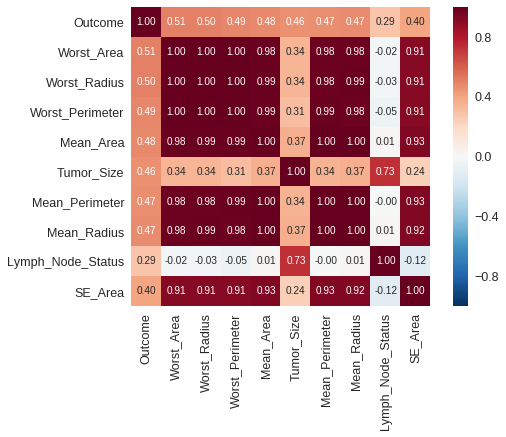

In [0]:
largest_r10 = r_matrix.nlargest(10, 'Outcome')['Outcome'].index
k =10 
cols = r_matrix.nlargest(k, 'Outcome')['Outcome'].index
cm = np.corrcoef(r_matrix[cols].values.T)
sns.set(font_scale=1.25) 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [0]:
cols

Index(['Outcome', 'Worst_Area', 'Worst_Radius', 'Worst_Perimeter', 'Mean_Area',
       'Tumor_Size', 'Mean_Perimeter', 'Mean_Radius', 'Lymph_Node_Status',
       'SE_Area'],
      dtype='object')

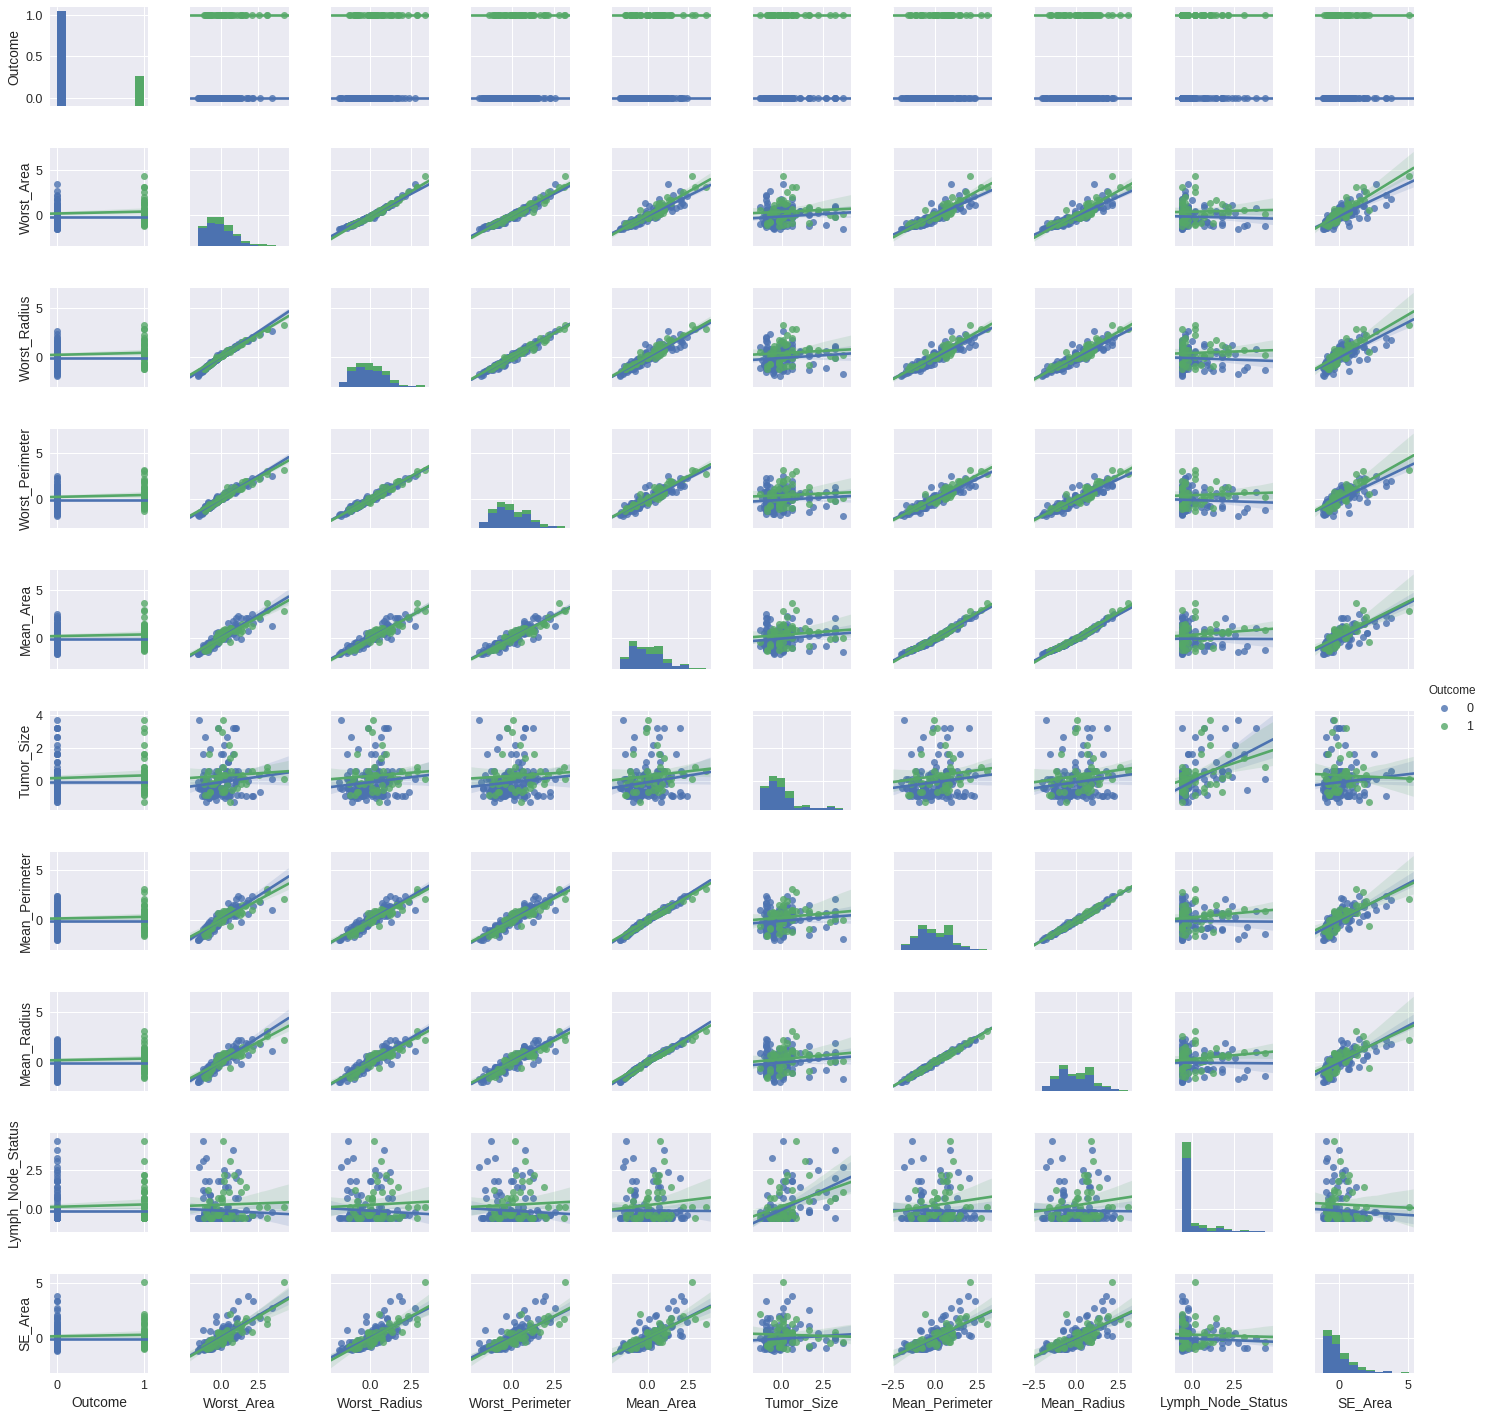

In [0]:
sns.pairplot(data.loc[:,cols],hue='Outcome', kind='reg', size = 2)

## SVM

### データスプリット

In [0]:
# メモ データを一次元にする
# train.value.reshape(-1)

In [0]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

視覚化のための関数を用意する

In [0]:
# グラフ化
def plot_regions(X, y, classifier, resolution=0.01, row= 'Tumor_Size', col='Time'):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    markers = ('s', 'x')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[row].min() - 1, X[ row].max() + 1
    x2_min, x2_max = X[col].min() - 1, X[col].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.scatter(X[row],X[col], c=y['Outcome'],cmap="viridis")

### SVMのモデリング

In [0]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
    ]

clf = GridSearchCV(
    SVC(probability = True), # 識別器 probability = Trueにしないとpredict_probaエラーになる
    tuned_parameters, # 最適化したいパラメータセット 
    cv=5, # 交差検定の回数
    scoring='roc_auc') # モデルの評価関数の指定

In [0]:
clf.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]}, {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]}, {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [0]:
clf.grid_scores_

[mean: 0.74598, std: 0.11714, params: {'C': 1, 'kernel': 'linear'},
 mean: 0.74784, std: 0.13814, params: {'C': 10, 'kernel': 'linear'},
 mean: 0.77262, std: 0.12519, params: {'C': 100, 'kernel': 'linear'},
 mean: 0.77553, std: 0.10552, params: {'C': 1000, 'kernel': 'linear'},
 mean: 0.70187, std: 0.12309, params: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.71823, std: 0.13306, params: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.70175, std: 0.12722, params: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.71514, std: 0.14523, params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.70593, std: 0.14059, params: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.71820, std: 0.14535, params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.77339, std: 0.08893, params: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.71385, std: 0.14556, params: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.53067, std: 0.11654, params: {'C': 1, 'degree': 2

In [0]:
clf.best_params_

{'C': 1000, 'kernel': 'linear'}

In [0]:
y_true_svm, y_pred_svm = y_test, clf.predict(X_test)

## LightGBM

In [0]:
#データ
y_ = data['Outcome']
X_ = data.drop(['Outcome'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=23)

In [0]:
!pip install lightgbm

In [0]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

from sklearn.model_selection import KFold, cross_val_score

# LGBMのパラメータの設定
lgm_params = {
          'objective' : 'binary',
          'boosting_type': 'gbdt',
          'metric' : 'auc',
          'nthread' : 4,
          'shrinkage_rate':0.01,
          'max_depth':18,
          'min_child_weight': 2,
          'bagging_fraction':0.65,
          'feature_fraction':0.8,
          'lambda_l1':1,
          'lambda_l2':1,
          'num_leaves':35}        

# LGBMのモデルの作成
lgbm_model = lgb.train(
                                params = lgm_params, 
                                train_set = lgb.Dataset(X_train, y_train), 
                                num_boost_round = 3000, 
                                valid_sets = [lgb.Dataset(X_train, y_train), lgb.Dataset(X_test, y_test)],
                                verbose_eval=10, 
                                early_stopping_rounds=20)

# 記録　[1139]	valid_0's auc: 0.794641	valid_1's auc: 0.754739

Training until validation scores don't improve for 20 rounds.
[10]	valid_0's auc: 0.86332	valid_1's auc: 0.929688
[20]	valid_0's auc: 0.870056	valid_1's auc: 0.947266
[30]	valid_0's auc: 0.878205	valid_1's auc: 0.964844
[40]	valid_0's auc: 0.880813	valid_1's auc: 0.964844
Early stopping, best iteration is:
[28]	valid_0's auc: 0.873425	valid_1's auc: 0.964844


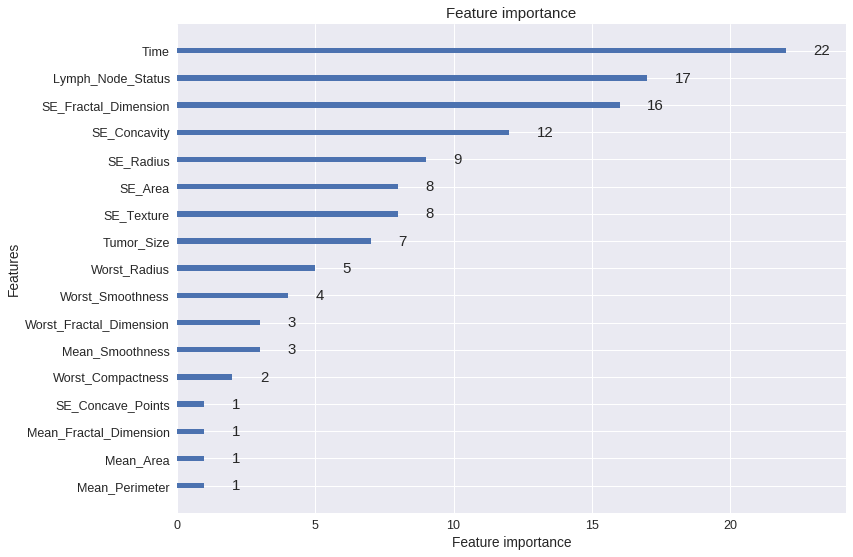

In [0]:
lgb.plot_importance(lgbm_model, max_num_features=30, figsize=(12, 9))

In [0]:
y_true_lgm, y_pred_lgm = y_test, lgbm_model.predict(X_test)

In [0]:
y_pred_lgm

array([0.21906414, 0.25591399, 0.25062641, 0.26674226, 0.25342358,
       0.20912353, 0.27640249, 0.25443239, 0.20912353, 0.21641439,
       0.29326501, 0.25755036, 0.22031155, 0.31229898, 0.31678766,
       0.21641439, 0.23066246, 0.20792257, 0.21210876, 0.2725143 ,
       0.25648586, 0.21641439, 0.27894721, 0.29855597, 0.24407938,
       0.23955952, 0.22595216, 0.26937223, 0.21641439, 0.31306979,
       0.26876136, 0.23890726, 0.25803828, 0.21641439, 0.29060243,
       0.25529477, 0.2177356 , 0.20792257, 0.31580476, 0.23234123])

## 評価

In [0]:
# import* で全てimportする
from sklearn.metrics import*

# roc_auc_score
print('roc_auc_score')
print('SVM:{}'.format(roc_auc_score(y_true_svm, y_pred_svm)))
# print('LGM:{}'.format(roc_auc_score(y_true_lgm, y_pred_lgm)))

# Accuracy
print('accuracy_score')
print('SVM:{}'.format(accuracy_score(y_true_svm, y_pred_svm)))
# print('LGM:{}'.format(accuracy_score(y_true_lgm, y_pred_lgm)))

# Recall
print('recall_score')
print('SVM:{}'.format(recall_score(y_true_svm, y_pred_svm)))

# Precision
print('precision_score')
print('SVM:{}'.format(precision_score(y_true_svm, y_pred_svm)))

# F1-measure
print('F1_score')
print('SVM:{}'.format(f1_score(y_true_svm, y_pred_svm)))


roc_auc_score
SVM:0.71875
accuracy_score
SVM:0.775
recall_score
SVM:0.625
precision_score
SVM:0.45454545454545453
F1_score
SVM:0.5263157894736842


In [0]:
# 評価関数のスクラッチ
y_true_svm = np.array(y_true_svm)
y_pred_svm = np.array(y_pred_svm)
    
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_true_svm)):
    if y_true_svm[i] == np.array([1]) and y_pred_svm[i] == np.array([1]):
        TP += 1
    if y_true_svm[i] == np.array([0]) and y_pred_svm[i] == np.array([1]):
        FP += 1
    if y_true_svm[i] == np.array([0]) and y_pred_svm[i] == np.array([0]):
        TN += 1
    if y_true_svm[i] == np.array([1]) and y_pred_svm[i] == np.array([0]):
        FN += 1

In [0]:
# roc_auc_score
print('roc_auc_score')
print('SVM:{}'.format(roc_auc_score(y_true_svm, y_pred_svm)))
# print('LGM:{}'.format(roc_auc_score(y_true_lgm, y_pred_lgm)))

# Accuracy
acc = (TP + TN) / (TP + FP + TN + FN)
print('accuracy_score')
print('SVM:{}'.format(acc))
# print('LGM:{}'.format(accuracy_score(y_true_lgm, y_pred_lgm)))

# Recall
rec = TP / (FN + TP)
print('recall_score')
print('SVM:{}'.format(rec))

# Precision
pre = TP / (TP + FP)
print('precision_score')
print('SVM:{}'.format(pre))

# F1-measure
f1 = 2 * ((pre * rec) / (pre + rec))
print('F1_score')
print('SVM:{}'.format(f1))

roc_auc_score
SVM:0.71875
accuracy_score
SVM:0.775
recall_score
SVM:0.625
precision_score
SVM:0.45454545454545453
F1_score
SVM:0.5263157894736842


## ROC Plot

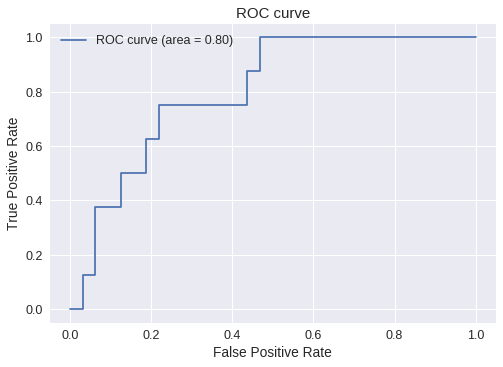

In [0]:
from sklearn import metrics
prob = clf.predict_proba(X_test)
# prob[:, 1]で1になるもののみ取り出す
fpr, tpr, thresholds = metrics.roc_curve(y_true_svm, prob[:, 1])
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## SVM スクラッチ (ただしサポートベクトルは求めない)

$ \begin{equation}
L_i = \sum_{j\neq y_i} \left[ \max(0, x_iw_j - x_iw_{y_i} + \Delta) \right] \tag{1}
\end{equation} $



$ ・iはすべてのN個のサンプルを反復します$

$ ・jはすべてのC(クラス)数を反復処理します$

$ ・Liは損失関数(hinge)で、あるサンプルxi（行ベクトル）を分類します$

$ ・wjは、あるクラスjのスコアを計算するための重み（列ベクトル）です $

$ ・yiはxiの正しいクラスのインデックスです  $

$ ・Δはマージンパラメータです  $

(デルタは最低限のマージというイメージで実装します)

In [0]:
def L_i(x, y, W):
    delta = 1.0 
    scores = np.dot(W, x)
    correct_class_score = scores[y]
    D = W.shape[0] # number of classes
    loss_sum = 0.0
    for j in range(D): # iterate over all wrong classes
        if j == y:
          # skip for the true class to only loop over incorrect classes
          continue
        # accumulate loss for the i-th example
        loss_i = max(0, scores[j] - correct_class_score + delta)
        loss_sum += loss_i
    return loss_sum

# デルタは最低マージというイメージ。

In [0]:
from numpy.random import *
W = rand(2, 2) # shape(3, 2) W[0]がクラス数, W[1]がx[1]に従属する次元数(y = ax + bのaです)
x = rand(2, 2) # shape(2, 2) x[0]がサンプル点 , x[1]が特徴量
y = np.array([[0],[1]]) # 境界線を分ける0,1の値。　その1の場合を求める
print(W.shape)
print(x.shape)
print(y.shape)

(2, 2)
(2, 2)
(2, 1)


In [0]:

dW = np.zeros(W.shape)    

num_classes = W.shape[1]
num_train = X.shape[0]
loss = 0.0
for i in range(num_train):
    scores = W.dot(X[:, i])
    correct_class_score = scores[y[i]]
    diff_count = 0
    for j in range(num_classes):
        if j == y[i]:
            continue
        margin = scores[j] - correct_class_score + 1 # note delta = 1
        if margin > 0:
            diff_count += 1
            dW[:, j] += X[i] # gradient update for incorrect rows
            loss += margin
    # gradient update for correct row
    dW[:, y[i]] += -diff_count * X[i][:, np.newaxis]
    
print('loss:{}'.format(loss))
print('dW:{}'.format(dW))


loss:[2.22933578]
dW:[[0. 0.]
 [0. 0.]]


減少してゆく様子を出せればよかったのですが、  
ひとまず下がっているはずです…。  
私は動かすだけで精一杯でした。

# Report課題

## 説明するもの  

SVMとは  
SVMにおけるカーネルとは  
線形回帰やロジスティック回帰との比較  

- SVMとは
SVMは分類にも回帰にも使える手法です。強力な手法のひとつともいえます。  
SVMは2つのクラスを分割するための超平面を探します。  
超平面というのは、例えば一次元の線上の点群を分類するために二次元空間に展開させた時に引ける線(面)です。  
イメージで言えば、紙を横から見ている時が一次元。それを倒し、面にした時に描かれている点に線を引く感じです。  
超平面は最も近い分類する点との距離（マージン）を最大化するようにとります  


- SVMにおけるカーネルとは  
カーネルは、先ほどの一次元から二次元化の際に用いた関数のことです。  
カーネル関数により高次元を考えることで、複雑な分類（非線形問題）への対応も可能になっています  
RBFカーネルが一般的に使われます  

- 線形回帰やロジスティック回帰との比較  
線形回帰は、連続値の予想ですので、分類をすることはできませんがSVMは分類問題を扱うことができる大きな違いがあります。  
ロジスティック回帰分析との違いは、片方のデータ群の表れ方が0.5以上の領域がないと、エラーになることです。  
また、線形分離不可能パターンの例として、XORパターンが出た場合にはSVM出ないと取り組めません。  

## チューニング
ハイパーパラメータを含めモデルは最適なものを選択してください。その際、最適だと判断した過程も説明してください。  

最適なモデルの選定には交差検証（Cross-validation）が必要です。計算には時間がかかることが想定されます。時間配分に気をつけてください。  

尚、ハイパーパラメータについては、それぞれ以下の視点から説明を行う必要があります。  

どのようなものか  
値を変えるとどのようなことが起こるか  

SVMの最適なカーネル選択についてですが、これは全部試すのが最もリアリティのある答えです。  
性能比較をし、最もよかったカーネルを選択します。  
では、その根拠を説明します。  

交差検証と、グリッドサーチによるハイパーパラメータの最適化を行なってい
るため信頼ができます。  
交差検証は、学習する際にその偏りが起こらないよう学習データの全ての範囲を分割しその回数分学習を分散させる手法です。  
そのため、極端な偶発的な数値ではないということが言えます。  

グリッドサーチより先にハイパーパラメータを説明します。  
ハイパーパラメータは、学習する際に影響を与える数値です。  
例えばイメージで言えば、エアコン設定で、その温度や風向きを調整するのがハイパーパラメータと言えます。その値によって室温という結果が変化します。  
その設定を総当たりで試し最も良い結果を用いるのがグリッドサーチと呼ばれる手法です。  

これらによって導かれているカーネル選択とその結果であるため  
それが最適なモデルと判断できます。

___  
しかしそれでも信用ならない、そのパラメータについて全て知りたいという方のためにカーネル選択におけるパラメータをいくつかお話をします。  

コストペナルティというパラメータがあります。  
このコストペナルティを用いて間違いを認めるSVMのことを、そうではないものと明確に区別するときは、ソフトマージンSVM（またはC-SVM）と呼びます。この時、間違いを認めないものはハードマージンSVMです。  
コストペナルティを一言で言えば「誤分類されている度合い」を示しています。  

もう一つ重要なパラメータがあります、「gamma」です。  
[こちらの下の図がわかりやすいです](https://qiita.com/sz_dr/items/f3d6630137b184156a67)  
ガンマをあげると、そのクラスタに対して境界線を狭めて囲む強度が上がっています。  